In [11]:
from deepface import DeepFace

In [12]:
import cv2
import matplotlib.pyplot as plt

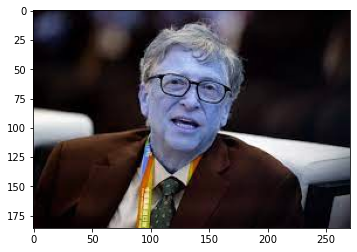

In [13]:
img = cv2.imread('bill gates.jpg')
plt.imshow(img)

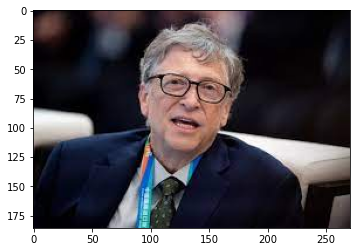

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [15]:
face_cascade = cv2.CascadeClassifier('C:\\Users\Dell\\Deep Learning Playlist\\object detection opencv\\haarcascades\\haarcascade_frontal_face_default.xml')

In [16]:
prediction = DeepFace.analyze(img) 

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 295ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:01,  1.53it/s]

1/1 [==============================] - 0s 414ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:01<00:01,  1.84it/s]

1/1 [==============================] - 0s 390ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.02it/s]

1/1 [==============================] - 0s 367ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.03it/s]


In [17]:
font = cv2.FONT_HERSHEY_SIMPLEX 
cv2.putText(img,prediction['dominant_emotion'],(50,50),font,3,(0,255,0),2,cv2.LINE_4);

In [18]:
prediction 

{'emotion': {'angry': 0.5554444353067202,
  'disgust': 0.004226948434765823,
  'fear': 64.02748394340085,
  'happy': 0.13621106504929842,
  'sad': 6.3287802134490265,
  'surprise': 28.244892149554747,
  'neutral': 0.7029645517277183},
 'dominant_emotion': 'fear',
 'region': {'x': 79, 'y': 25, 'w': 96, 'h': 96},
 'age': 47,
 'gender': 'Man',
 'race': {'asian': 0.4960079507385463,
  'indian': 0.08075191771436738,
  'black': 0.010532722708624093,
  'white': 92.70008162856588,
  'middle eastern': 3.1616812593746935,
  'latino hispanic': 3.5509487867920866},
 'dominant_race': 'white'}

In [21]:
import cv2
import numpy as np
import argparse 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,model_from_json
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
model=Sequential()
cv2.putText(img,prediction['dominant_emotion'],(50,50),font,3,(0,255,0),2,cv2.LINE_4);

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))


In [23]:
import cv2
def emotion_recog(frame):
    model.built = True
    model.load_weights("model.h5")
    cv2.ocl.setUseOpenCL(False)
    emotion_dict={0:"angry",1:"disgusted",2:"Fearful",3:"happy",4:"neutral",5:"sad",6:"surprise"}
    face_cascade = cv2.CascadeClassifier('C:\\Users\Dell\\Deep Learning Playlist\\object detection opencv\\haarcascades\\haarcascade_frontal_face_default.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,255),3)
      roi_gray=gray[y:y+h,x:x+w]
      cropped_img=np.expand_dims(np.expand_dims(cv2.resize(roi_gray,(48,48)),-1),0)
      prediction=model.predict(cropped_img)
      max_index=int(np.argmax(prediction))
      cv2.putText(frame,emotion_dict[max_index],(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA);
      return frame



1/1 [==============================] - 0s 69ms/step


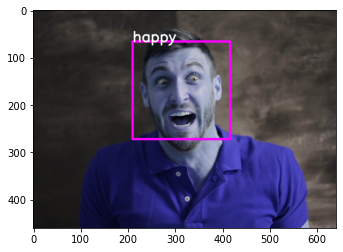

In [24]:
input=cv2.imread("image1.jpg")
output=emotion_recog(input)
plt.imshow(output)

# Capture Emotion in Video 

In [ ]:
import cv2
cap=cv2.VideoCapture('shayri2.mp4')
ret,frame=cap.read() 
frame_height, frame_width, _ = frame.shape


out=cv2.VideoWriter("output.avi",cv2.VideoWriter_fourcc('M','J','P','G'),10,(frame_width,frame_height))
print("processing video...")
while cap.isOpened():
  ret,frame=cap.read()
  if not ret:
    out.release()
    
    break
  output=emotion_recog(frame)
  out.write(output)
out.release()
print("done processing") 

In [ ]:
import cv2
cap=cv2.VideoCapture(0)
ret,frame=cap.read() 
frame_height, frame_width, _ = frame.shape


out=cv2.VideoWriter("output.avi",cv2.VideoWriter_fourcc('M','J','P','G'),10,(frame_width,frame_height))
print("processing video...")
while cap.isOpened():
  ret,frame=cap.read()
  if not ret:
    out.release()
    
    break
  output=emotion_recog(frame)
  out.write(output)
out.release()
print("done processing") 